In [1]:
# Making the necessary imports
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import statistics

In [2]:
# Reading the  file
df=pd.read_csv(r"C:\Users\Sneha\Downloads\archive (10)\Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.dtypes


CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [5]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
df.cov()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,3350.000000,-21.638191,1486.050251,20.678392
Age,-21.638191,195.133166,-4.548744,-118.040201
Annual Income (k$),1486.050251,-4.548744,689.835578,6.716583
Spending Score (1-100),20.678392,-118.040201,6.716583,666.854271


In [7]:
df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


In [8]:
df_cat=df.select_dtypes(exclude=[np.number])

AxesSubplot(0.125,0.125;0.775x0.755)


C:\Users\Sneha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


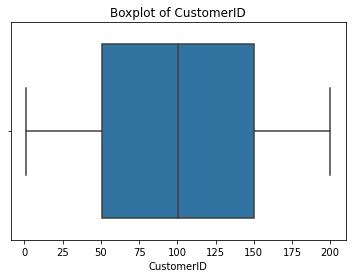

C:\Users\Sneha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


AxesSubplot(0.125,0.125;0.775x0.755)


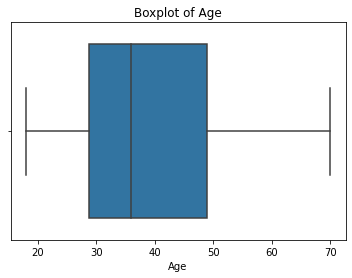

C:\Users\Sneha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


AxesSubplot(0.125,0.125;0.775x0.755)


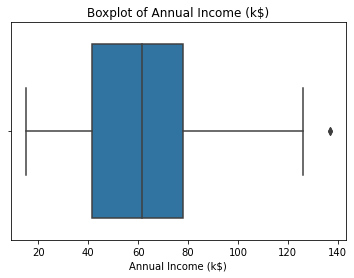

C:\Users\Sneha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


AxesSubplot(0.125,0.125;0.775x0.755)


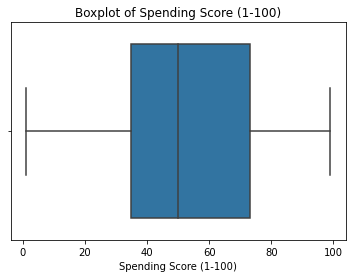

In [9]:
for i in df.columns:
    if i not in df_cat.columns:
        print(sns.boxplot(df[i]))
        plt.title(f"Boxplot of {i}")
        plt.show()

In [10]:
# calculate the first quartile
Q1 = df.quantile(0.25)

# calculate the third quartile
Q3 = df.quantile(0.75)

# The Interquartile Range (IQR) is defined as the difference between the third and first quartile
# calculate IQR for each numeric variable
IQR = Q3 - Q1

# retrieve the dataframe without the outliers
# '~' returns the values that do not satisfy the given conditions
# i.e. it returns values between the range [Q1-1.5*IQR, Q3+1.5*IQR]
# '|' is used as 'OR' operator on multiple conditions
# 'any(axis=1)' checks the entire row for atleast one 'True' entry (those rows represents outliers in the data)
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

C:\Users\Sneha\AppData\Local\Temp\ipykernel_3332\3719988616.py:16: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 198 entries, 0 to 197
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              198 non-null    int64 
 1   Gender                  198 non-null    object
 2   Age                     198 non-null    int64 
 3   Annual Income (k$)      198 non-null    int64 
 4   Spending Score (1-100)  198 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 9.3+ KB


In [12]:
df.shape

(198, 5)

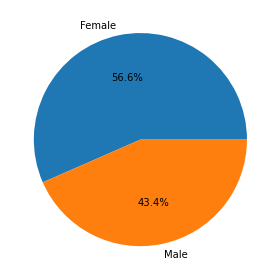

In [13]:
df['Gender'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.show()

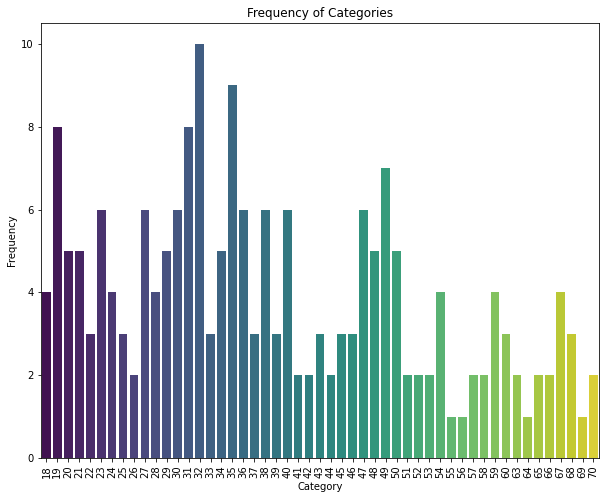

In [14]:
plt.figure(figsize=(10, 8))
sns.countplot(x='Age', data=df, palette='viridis')
plt.title('Frequency of Categories')
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

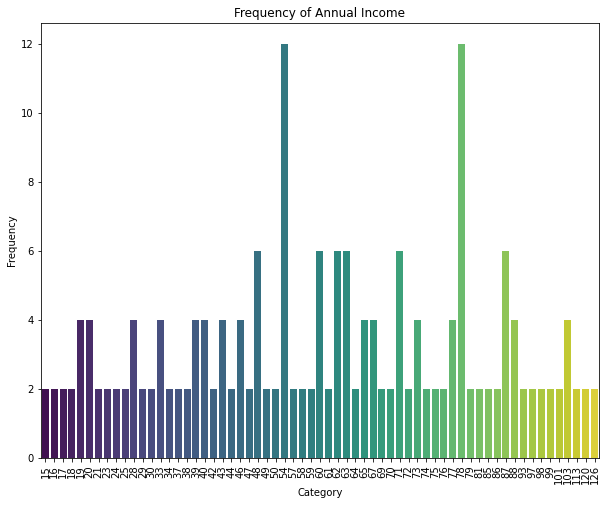

In [15]:
plt.figure(figsize=(10, 8))
sns.countplot(x='Annual Income (k$)', data=df, palette='viridis')
plt.title('Frequency of Annual Income')
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

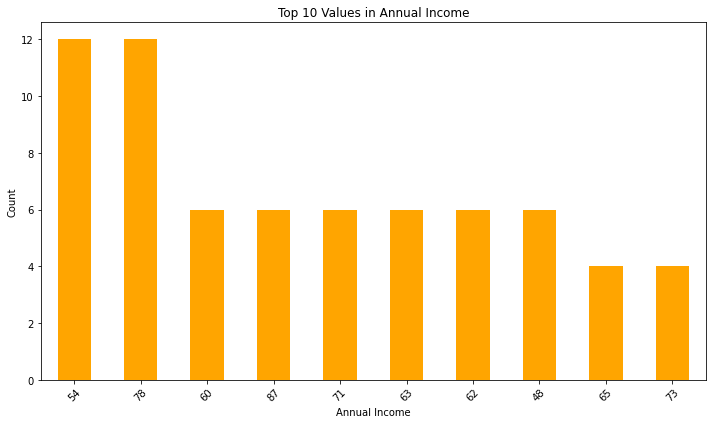

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and 'column' is the column you want to analyze
top_10_values = df['Annual Income (k$)'].value_counts().nlargest(10)

plt.figure(figsize=(10, 6))
top_10_values.plot(kind='bar', color='orange')
plt.title('Top 10 Values in Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


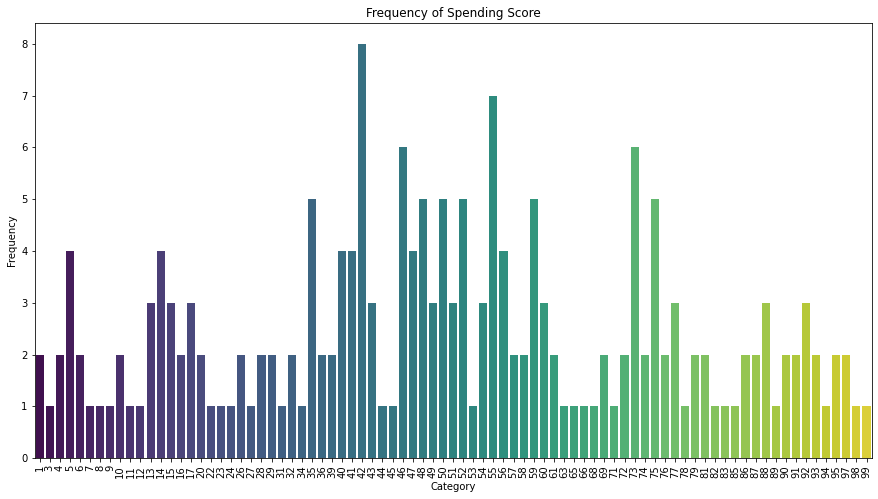

In [17]:
plt.figure(figsize=(15, 8))
sns.countplot(x='Spending Score (1-100)', data=df, palette='viridis')
plt.title('Frequency of Spending Score')
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

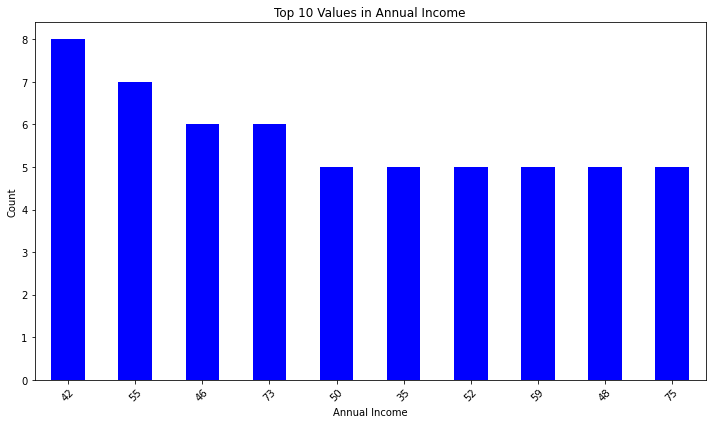

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and 'column' is the column you want to analyze
top_10_values = df['Spending Score (1-100)'].value_counts().nlargest(10)

plt.figure(figsize=(10, 6))
top_10_values.plot(kind='bar', color='blue')
plt.title('Top 10 Values in Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


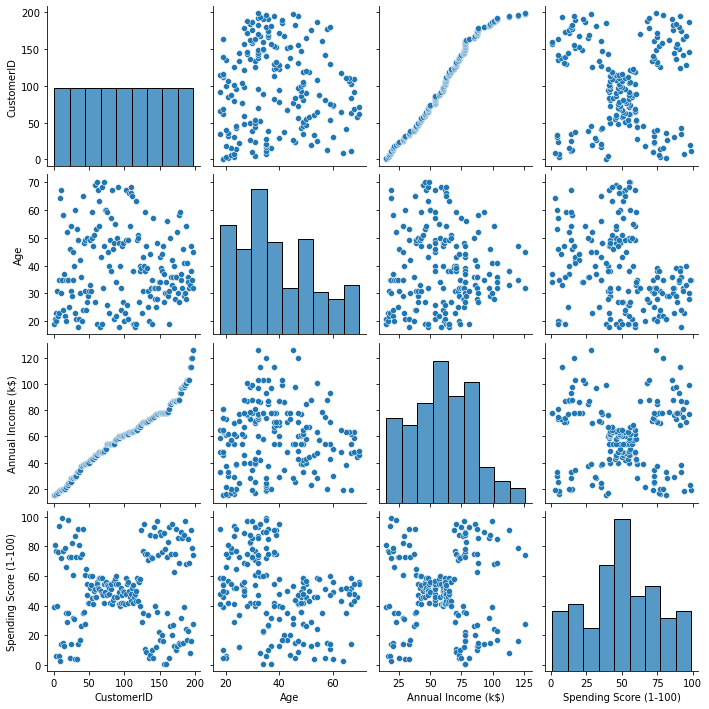

In [19]:
sns.pairplot(df)

In [20]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Compute correlation matrix
numeric_df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.017285,0.984367,0.013840
Age,-0.017285,1.000000,0.004406,-0.329421
Annual Income (k$),0.984367,0.004406,1.000000,0.010080
Spending Score (1-100),0.013840,-0.329421,0.010080,1.000000


In [22]:
# Variable Categorization
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_columns = df.select_dtypes(exclude=[np.number]).columns.tolist()


In [23]:
# pass the list of variables to the drop()
# 'axis = 1' drops the specified column
df_feat = df.drop(["CustomerID", "Gender"], axis = 1)

# check the first five observations
df_feat.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
# use 'StandardScaler' to transform data into standard form
# store the transformed data in the variable 'scaled_features' 
scaled_features= StandardScaler().fit_transform(df_feat)

# to print 'scaled_features'
scaled_features

array([[-1.42541358, -1.77917141, -0.43598941],
       [-1.2823665 , -1.77917141,  1.19941337],
       [-1.35389004, -1.73944701, -1.72094874],
       [-1.13931942, -1.73944701,  1.04366072],
       [-0.5671311 , -1.69972262, -0.39705125],
       [-1.21084296, -1.69972262,  1.00472256],
       [-0.28103694, -1.65999822, -1.72094874],
       [-1.13931942, -1.65999822,  1.70560947],
       [ 1.79314572, -1.62027383, -1.83776323],
       [-0.63865464, -1.62027383,  0.84896992],
       [ 2.00771635, -1.62027383, -1.40944345],
       [-0.28103694, -1.62027383,  1.90030028],
       [ 1.36400448, -1.58054943, -1.37050529],
       [-1.06779588, -1.58054943,  1.04366072],
       [-0.13798986, -1.58054943, -1.44838161],
       [-1.21084296, -1.58054943,  1.12153705],
       [-0.28103694, -1.54082504, -0.59174206],
       [-1.35389004, -1.54082504,  0.61534095],
       [ 0.93486324, -1.46137625, -0.82537103],
       [-0.28103694, -1.46137625,  1.86136212],
       [-0.28103694, -1.42165185, -0.591

In [26]:
summary = pd.DataFrame(scaled_features, columns = df_feat.columns)

# print the summary statistics
# use 'round()' to round-off the values to integers
round(summary.describe())

,Age,Annual Income (k$),Spending Score (1-100)
count,198.0,198.0,198.0
mean,0.0,0.0,0.0
std,1.0,1.0,1.0
min,-1.0,-2.0,-2.0
25%,-1.0,-1.0,-1.0
50%,-0.0,0.0,-0.0
75%,1.0,1.0,1.0
max,2.0,3.0,2.0


In [32]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [33]:
wcss = []

# pass the range to iterate the value of k
# last number in the range() is exclusive
for k in range(1,8):
    
    # fit K-means clustering with number of clusters K
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_features)
    
    # use 'inertia_' to get wcss 
    # append the value of WCSS for each K to the list 'wcss'
    wcss.append(kmeans.inertia_)

# print the within cluster sum of squares
print(wcss)

C:\Users\Sneha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[594.0, 385.28045294960293, 291.690873050862, 202.69707701808602, 164.20847133144312, 128.64249874250424, 112.1419495780195]


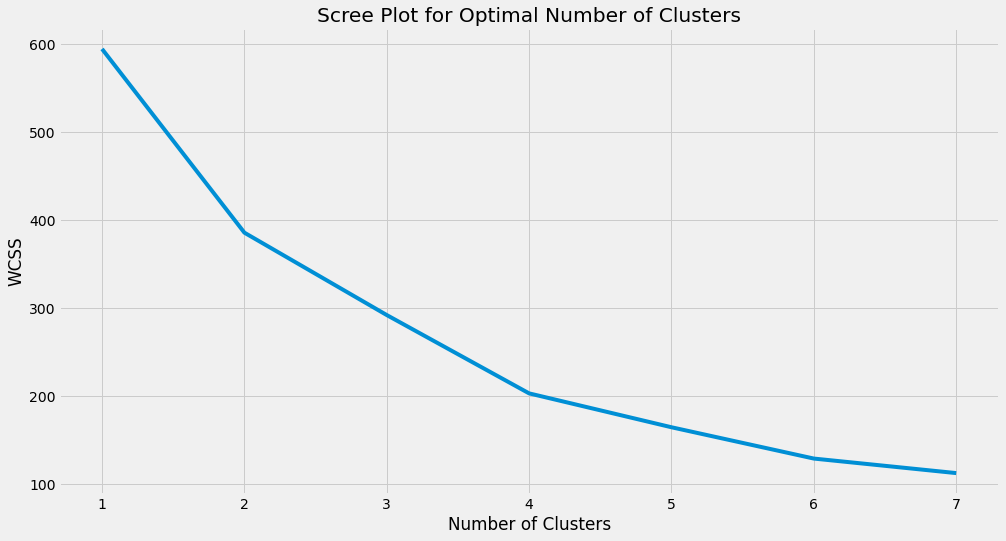

In [34]:
# visualize the elbow plot to get the optimal value of K

# set the plot style 
plt.style.use("fivethirtyeight")

# set the plot size using 'figsize'
plt.figure(figsize=(15,8))

# plot the elbow plot
# pass the values for K and WCSS
# last number in the range() is exclusive
plt.plot(range(1,8), wcss) 

# set the axes and plot labels
plt.xlabel("Number of Clusters")
plt.title('Scree Plot for Optimal Number of Clusters')
plt.ylabel("WCSS")

# display the plot
plt.show()

In [37]:
# we fit k means clustering algorithm with k=3
# number of clusters to form is given by 'n_clusters'
# pass the 'random_state' to consider the same centroid initialization over multiple code runs
# maximum number of iterations of the k-means algorithm for a single run is given by 'max_iter'
# pass the relative tolerance to declare the convergence of algrithm to 'tol'
Kmeans3=KMeans(n_clusters = 4, random_state = 15, max_iter = 200, tol = 0.001)

# fit the model on the scaled data
Kmeans3.fit(scaled_features)

KMeans(max_iter=200, n_clusters=4, random_state=15, tol=0.001)

In [38]:
# store the lables in 'result'
result = Kmeans3.labels_

# create a dataframe of cluster labels
# pass the column name to the parameter 'cluster'
result = pd.DataFrame(result, columns = ["cluster"])

# group the data based on cluster labels and get size of each cluster
obs = result.groupby('cluster').size()

# print the cluster size
obs

cluster
0    65
1    37
2    39
3    57
dtype: int64

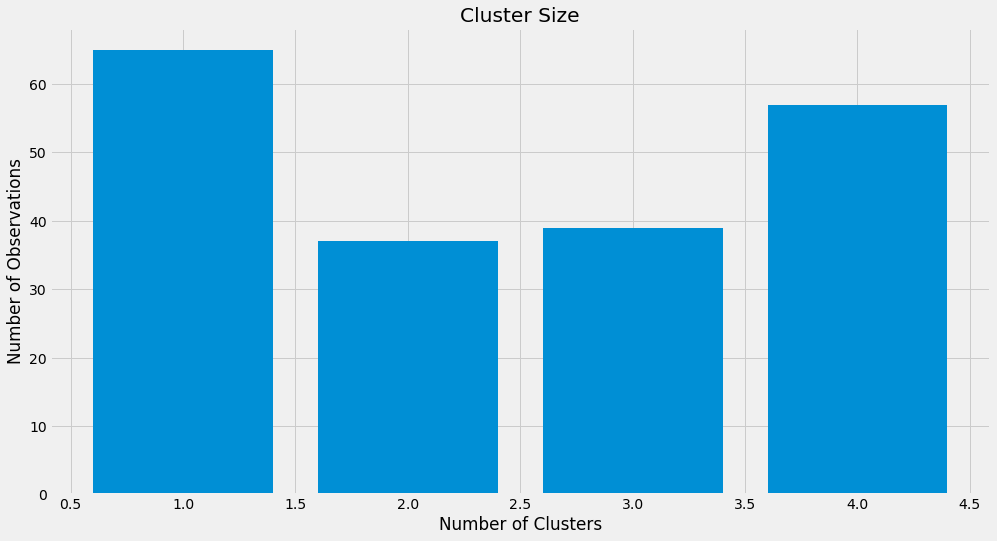

In [40]:
# plot the number of observations in each cluster

# select style of histogram
plt.style.use("fivethirtyeight")

# set the figure size using 'figsize'
plt.figure(figsize=(15,8))

# plot the barplot of number of observations in each cluster
# last number in the range() is exclusive
plt.bar(range(1,5), obs)

# set the plot and axes labels
plt.title('Cluster Size')
plt.xlabel('Number of Clusters')
plt.ylabel('Number of Observations')

# to show the barplot
plt.show()

In [41]:
# 'cluster_centers_' returns the centroids of each cluster
centroids=Kmeans3.cluster_centers_

# create a dataframe of centroids
# pass the column names to 'columns'
centroids=pd.DataFrame(centroids, columns = df_feat.columns)

# print the centroids
centroids

,Age,Annual Income (k$),Spending Score (1-100)
0,1.076810,-0.479878,-0.398249
1,0.045652,1.006904,-1.190548
2,-0.427752,0.993388,1.218383
3,-0.964902,-0.786062,0.393325


In [43]:
# store the observations belonging to cluster 1 in d1
d1=df[Kmeans3.labels_ == 0]

# print the first five observations
d1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
6,7,Female,35,18,6
8,9,Male,64,19,3
10,11,Male,67,19,14
12,13,Female,58,20,15
14,15,Male,37,20,13


In [44]:
# statistical summary of the observations in 1st cluster
d1.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,65.000000,65.000000,65.000000,65.000000
mean,69.415385,53.984615,47.707692,39.969231
std,34.295541,9.418221,14.648723,16.405953
min,7.000000,35.000000,18.000000,3.000000
25%,43.000000,48.000000,39.000000,32.000000
50%,71.000000,52.000000,49.000000,46.000000
75%,94.000000,63.000000,60.000000,51.000000
max,161.000000,70.000000,79.000000,60.000000


In [46]:
# store the observations belonging to cluster 2 in d2
d2=df[Kmeans3.labels_ == 1]

# print the first five observations
d2.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
112,113,Female,38,64,42
121,122,Female,38,67,40
124,125,Female,23,70,29
126,127,Male,43,71,35
130,131,Male,47,71,9


In [47]:
# statistical summary of the observations in 2nd cluster
d2.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,37.000000,37.000000,37.000000,37.000000
mean,159.513514,39.567568,85.135135,19.621622
std,23.328120,10.691483,14.697245,11.842371
min,113.000000,19.000000,64.000000,1.000000
25%,141.000000,34.000000,75.000000,10.000000
50%,159.000000,41.000000,78.000000,17.000000
75%,179.000000,47.000000,93.000000,28.000000
max,197.000000,59.000000,126.000000,42.000000


In [49]:
# store the observations belonging to cluster 3 in d3
d3=df[Kmeans3.labels_ == 2]

# print the first five observations
d3.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
122,123,Female,40,69,58
123,124,Male,39,69,91
125,126,Female,31,70,77
127,128,Male,40,71,95
129,130,Male,38,71,75


In [50]:
# statistical summary of the observations in 3rd cluster
d3.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,39.000000,39.000000,39.000000,39.000000
mean,160.025641,32.948718,84.794872,81.487179
std,22.760177,3.879424,14.285030,10.127793
min,123.000000,27.000000,69.000000,58.000000
25%,141.000000,30.000000,74.500000,74.000000
50%,160.000000,32.000000,78.000000,83.000000
75%,179.000000,36.000000,90.500000,90.000000
max,198.000000,40.000000,126.000000,97.000000


In [51]:
# store the observations belonging to cluster 3 in d3
d4=df[Kmeans3.labels_ == 2]

# print the first five observations
d4.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
122,123,Female,40,69,58
123,124,Male,39,69,91
125,126,Female,31,70,77
127,128,Male,40,71,95
129,130,Male,38,71,75


In [52]:
# statistical summary of the observations in 3rd cluster
d4.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,39.000000,39.000000,39.000000,39.000000
mean,160.025641,32.948718,84.794872,81.487179
std,22.760177,3.879424,14.285030,10.127793
min,123.000000,27.000000,69.000000,58.000000
25%,141.000000,30.000000,74.500000,74.000000
50%,160.000000,32.000000,78.000000,83.000000
75%,179.000000,36.000000,90.500000,90.000000
max,198.000000,40.000000,126.000000,97.000000
